In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 400)
import Random_event_simulation as rand_event
import Visu_data as visu
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from arch import arch_model
import statsmodels.api as sm

In [2]:
file = '/Users/edouard/Desktop/Rosenbaum/Price-Impact-and-other-HF-stuffs/Rosenbaum/xnas-itch-20240726.mbp-10.csv'
df   = pd.read_csv(file)
df.head()

data = visu.data_analysis(df)
data.stats_()


 -- Dataset statistics -- 

Tick                                  : 0.01
Average Bid-ask                       : 0.017890064653789554
Number of Jumps of more than just one : 13385
Number of Jumps of less than just one : 58207
Average jump size (up)                : 1.3650122814614385
Average jump size (down)              : -1.2955830054797075
Number of up jumps                    : 55368
Number of down jumps                  : 58207

 -- Graphs -- 


In [3]:
data.df['mid_price_diff'] = data.df['mid'].diff(1)/data.tick
print(data.df[data.df['mid_price_diff']>100].head())

Empty DataFrame
Columns: [ts_event, action, side, size, price, bid_px_00, ask_px_00, bid_sz_00, ask_sz_00, bid_ct_00, ask_ct_00, bid_px_01, ask_px_01, bid_sz_01, ask_sz_01, bid_ct_01, ask_ct_01, time_diff, price_same, price_opposite, size_same, size_opposite, nb_ppl_same, nb_ppl_opposite, diff_price, Mean_price_diff, imbalance, indice, bid_sz_00_diff, ask_sz_00_diff, status, new_limite, price_middle, mid, time_sec, mid_price_diff]
Index: []


In [4]:
print(data.jump_counts_up)

{1: 41983, 5: 200, 7: 25, 9: 24, 8: 16, 3: 2631, 2: 9804, 4: 494, 6: 74, 11: 29, 10: 38, 12: 9, 13: 4, 20: 2, 17: 3, 14: 6, 19: 2, 23: 5, 102: 2, 25: 1, 15: 3, 29: 1, 100: 3, 101: 1, 104: 1, 21: 3, 16: 1, 27: 1, 22: 1, 32: 1}


In [5]:
data.df.head()

ts_event action side  size   price  bid_px_00  \
0 2024-07-26 14:00:00.008833594+00:00      C    A    30  164.96     164.93   
1 2024-07-26 14:00:00.010165122+00:00      T    B    20  164.93     164.92   
5 2024-07-26 14:00:00.010368720+00:00      C    A    50  164.91     164.92   
6 2024-07-26 14:00:00.010452070+00:00      T    B    21  164.92     164.91   
7 2024-07-26 14:00:00.010521939+00:00      T    B    85  164.91     164.90   

   ask_px_00  bid_sz_00  ask_sz_00  bid_ct_00  ask_ct_00  bid_px_01  \
0     164.96         20        120          1          2     164.92   
1     164.96         71        120          3          2     164.91   
5     164.95         21         50          2          1     164.91   
6     164.95         85         50          5          1     164.90   
7     164.95        196         50          7          1     164.89   

   ask_px_01  bid_sz_01  ask_sz_01  bid_ct_01  ask_ct_01  time_diff  \
0     164.97         71        768          3          4   0.002723   
1     164.97        135        768          6          4   0.001332   
5     164.96         85        240          5          4   0.000048   
6     164.96        196        240          7          4   0.000083   
7     164.96        101        240          5          4   0.000070   

   price_same  price_opposite  size_same  size_opposite  nb_ppl_same  \
0      164.96          164.93        120             20            2   
1      164.92          164.96         71            120            3   
5      164.95          164.92         50             21            1   
6      164.91          164.95         85             50            5   
7      164.90          164.95        196             50            7   

   nb_ppl_opposite  diff_price  Mean_price_diff  imbalance  indice  \
0                1       0.000              NaN   0.714286       2   
1                2       0.005              NaN   0.256545       3   
5                2      -0.005              NaN   0.408451       7   
6                1       0.005              NaN  -0.259259       8   
7                1       0.005              NaN  -0.593496       9   

   bid_sz_00_diff  ask_sz_00_diff status new_limite  price_middle      mid  \
0               0             -30     OK          n         0.015  164.945   
1              51               0    NOK          n         0.020  164.940   
5               0            -190    NOK          n         0.015  164.935   
6              64               0    NOK          n         0.020  164.930   
7             111               0    NOK          n         0.025  164.925   

   time_sec  mid_price_diff  
0  0.000000             NaN  
1  0.001332            -0.5  
5  0.001535            -0.5  
6  0.001618            -0.5  
7  0.001688            -0.5

In [6]:
df_ = data.df

In [7]:
dic_up = data.jump_size_up
dic_down = data.jump_size_down

In [8]:
print(data.jump_size_up)

{1: [21, 10, 76, 20, 50, 400, 3, 18, 100, 66, 19, 2100, 121, 20, 2, 20, 6, 16, 20, 100, 50, 20, 9, 2, 20, 20, 100, 50, 14, 20, 50, 20, 50, 95, 19, 50, 134, 50, 20, 22, 16, 20, 20, 50, 11, 313, 20, 112, 219, 20, 20, 20, 20, 40, 40, 30, 10, 5, 30, 30, 30, 30, 20, 10, 30, 10, 50, 50, 22, 10, 10, 50, 100, 22, 20, 100, 100, 600, 20, 100, 1991, 11, 50, 20, 170, 103, 50, 19, 20, 545, 100, 96, 50, 94, 14, 20, 20, 28, 6, 50, 100, 1, 20, 5, 20, 100, 50, 50, 22, 14, 30, 97, 3, 30, 14, 14, 4, 14, 19, 30, 93, 10, 20, 30, 70, 10, 20, 10, 50, 68, 20, 30, 43, 132, 20, 50, 100, 30, 14, 20, 172, 20, 14, 94, 7, 93, 100, 14, 300, 1, 20, 100, 40, 50, 10, 10, 10, 80, 22, 20, 30, 30, 44, 94, 14, 14, 74, 74, 30, 20, 100, 20, 20, 50, 92, 50, 300, 100, 20, 20, 100, 20, 22, 1, 120, 114, 97, 14, 20, 20, 20, 20, 14, 9, 20, 10, 10, 14, 10, 14, 50, 20, 176, 100, 12, 52, 6, 20, 20, 300, 14, 90, 20, 3, 20, 14, 14, 20, 20, 100, 100, 1, 92, 3, 20, 94, 100, 50, 20, 93, 96, 14, 94, 100, 100, 1, 14, 9, 104, 20, 100, 20, 20

In [9]:
size_down = []
jumps_down = []
for i in dic_down.keys():
    jumps_down.append(i)
    size_down.append(np.mean(np.array(dic_down[i])))

jumps_down = np.array(jumps_down)
size_down = np.array(size_down)
ind_down = np.argsort(jumps_down)
jumps_down = jumps_down[ind_down]
size_down = size_down[ind_down]
size_up = []
jumps_up = []
for i in dic_up.keys():
    jumps_up.append(i)
    size_up.append(np.mean(np.array(dic_up[i])))

jumps_up = np.array(jumps_up)
size_up = np.array(size_up)
ind_up = np.argsort(jumps_up)
jumps_up = jumps_up[ind_up]
size_up = size_up[ind_up]

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=jumps_up, y=size_up, mode='lines', name="up", line=dict(width = 0.85, color = 'darkblue')))
fig.add_trace(go.Scatter(x=jumps_down, y=size_down, mode='lines', name="down", line=dict(width = 0.85, color = 'darkblue')))
fig.update_layout(
    title="Number of events N+ and N-",
    xaxis_title="Jump",
    yaxis_title="Size",
    plot_bgcolor='#D3D3D3',
    paper_bgcolor='#D3D3D3',
    xaxis=dict(showgrid=True, gridcolor='#808080'),
    yaxis=dict(showgrid=True, gridcolor='#808080')
)
fig.show()

In [11]:
dframe = data.df_
dframe["time_float"] = pd.to_datetime(dframe["ts_event"]).astype("int64")
dframe["time_float"] = dframe["time_float"] - dframe["time_float"].iloc[0]
dframe["delta_time"] = dframe["time_float"].diff(1)
dframe["delta_time"] = dframe["delta_time"].bfill()
dframe["time_float"] = dframe["time_float"]/dframe["time_float"].iloc[-1]
series = dframe["delta_time"].to_numpy()/1e4
# series = dframe['size']
dframe["mid"] = (dframe["bid_px_00"]+dframe["ask_px_00"])/2
# dframe = dframe[dframe["mid"].diff(1) != 0]
dframe = dframe[dframe["action"] == "T"]
dframe["rdt"] = np.abs(np.log(dframe["mid"])-np.log(dframe["mid"].shift(1)))
print(dframe["rdt"])
# dframe = dframe.dropna()

# print(len(dframe))
# dframe = dframe.dropna()
# series = dframe["size"].to_numpy()

# dframe["time_float"] = pd.to_datetime(dframe["ts_event"]).astype("int64")
# dframe["time_float"] = dframe["time_float"] - dframe["time_float"].iloc[0]
# dframe["delta_time"] = dframe["time_float"].diff(1)
# dframe["delta_time"] = dframe["delta_time"].bfill()
# series = dframe["delta_time"].to_numpy()/1e4
dframe["volat"] = dframe["rdt"].rolling(window = 200).mean()
print(len(dframe))
dframe = dframe.dropna()
series = dframe["volat"].to_numpy()



2              NaN
7         0.000061
8         0.000030
10        0.000000
13        0.000061
            ...   
803038    0.000060
803058    0.000030
803090    0.000030
803108    0.000030
803109    0.000060
Name: rdt, Length: 47360, dtype: float64
47360


In [12]:
print(series)

[3.57952935e-05 3.57954222e-05 3.59471005e-05 ... 4.00433402e-05
 4.01934070e-05 4.04935270e-05]


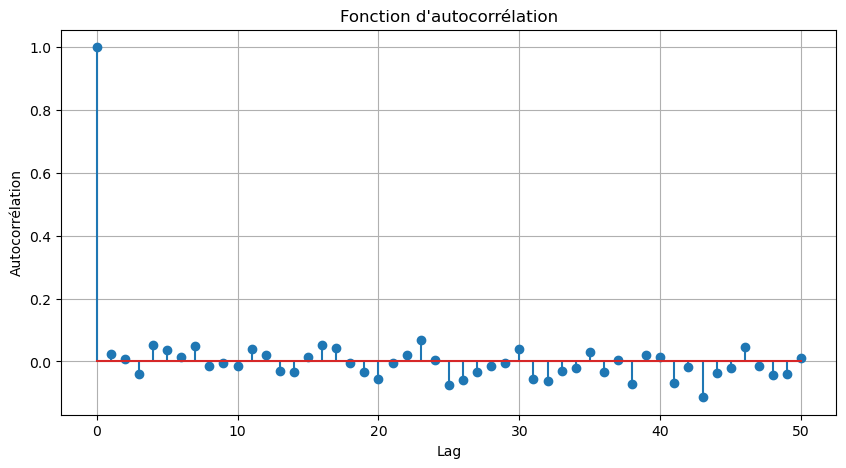

In [13]:
def plot_autocorrelation(series, max_lag=50):
    acf = [series.autocorr(lag=i) for i in range(max_lag + 1)]
    plt.figure(figsize=(10, 5))
    plt.stem(range(max_lag + 1), acf)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrélation")
    plt.title("Fonction d'autocorrélation")
    plt.grid(True)
    plt.show()

data = np.random.randn(1000)
series = pd.Series(data)

plot_autocorrelation(series, max_lag=50)


In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dframe['time_float'], y = dframe["volat"]))
fig.show()

In [15]:
t_min = dframe["time_float"].min()
t_max = dframe["time_float"].max()
nb_points = 1000
uniform_times = np.linspace(t_min, t_max, nb_points)
df_uniform = pd.DataFrame({'time_float': uniform_times})
dframe_sorted = dframe.sort_values("time_float")
df_uniform = pd.merge_asof(df_uniform, dframe_sorted, on="time_float", direction="nearest")



In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_uniform['time_float'], y = df_uniform["volat"]))
fig.show()

In [17]:
time = df_uniform["time_float"]
volatility = df_uniform["volat"]

In [18]:


df = df_uniform.sort_values("time_float").reset_index(drop=True)

n = len(df)
train_size = int(0.8 * n)
train_data = df["volat"].iloc[:train_size].copy()
test_data = df["volat"].iloc[train_size:].copy()
time_test = df["time_float"].iloc[train_size:].copy()

predictions = []
predicted_times = []

current_train = train_data.copy()

p_values = [1, 2, 3,4,5,6]
q_values = [1, 2, 3,4,5,6]

def grid_search_garch(series, p_vals, q_vals, mean='Zero', vol='Garch', dist='Normal'):
    best_aic = np.inf
    best_model = None
    best_p = None
    best_q = None
    for p in p_vals:
        for q in q_vals:
            try:
                model = arch_model(series, mean=mean, vol=vol, p=p, q=q, dist=dist)
                res = model.fit(disp="off", show_warning=False)
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_model = res
                    best_p = p
                    best_q = q
            except Exception as e:
                continue
    return best_model, best_p, best_q, best_aic

for i in range(len(test_data)):
    best_model, best_p, best_q, best_aic = grid_search_garch(current_train, p_values, q_values, mean='Zero', vol='Garch', dist='Normal')
    
    forecast = best_model.forecast(horizon=1)
    pred_vol = np.sqrt(forecast.variance.iloc[-1].values[0])
    predictions.append(pred_vol)
    predicted_times.append(time_test.iloc[i])
    
    current_train = pd.concat([current_train, pd.Series([test_data.iloc[i]])], ignore_index=True)

print(best_model, best_p, best_q, best_aic)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=predicted_times,
    y=test_data.values,
    mode='lines+markers',
    name='Volatilité Réelle'
))

fig.add_trace(go.Scatter(
    x=predicted_times,
    y=predictions,
    mode='lines+markers',
    name='Volatilité Prédite (Rolling Forecast)'
))

fig.update_layout(
    title='Rolling One-step Ahead Forecast avec optimisation de p et q',
    xaxis_title='Time (en secondes)',
    yaxis_title='Volatilité',
    template='plotly_white'
)

fig.show()


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                8763.11
Distribution:                  Normal   AIC:                          -17520.2
Method:            Maximum Likelihood   BIC:                          -17505.5
                                        No. Observations:                  999
Date:                Sun, Mar 30 2025   Df Residuals:                      999
Time:                        16:42:25   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4491e-10  2.837e-09  5.108e-02      0.959 

In [19]:
df = df_uniform.sort_values("time_float").reset_index(drop=True)

n = len(df)
train_size = int(0.8 * n)
train_data = df["volat"].iloc[:train_size].copy()
test_data = df["volat"].iloc[train_size:].copy()
time_test = df["time_float"].iloc[train_size:].copy()

def grid_search_garch(series, p_vals, q_vals, mean='Zero', vol='Garch', dist='Normal'):
    best_aic = np.inf
    best_model = None
    best_p = None
    best_q = None
    for p in p_vals:
        for q in q_vals:
            try:
                model = arch_model(series, mean=mean, vol=vol, p=p, q=q, dist=dist)
                res = model.fit(disp="off", show_warning=False)
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_model = res
                    best_p = p
                    best_q = q
            except Exception as e:
                continue
    return best_model, best_p, best_q, best_aic

p_values = [1, 2, 3]
q_values = [1, 2, 3]

models_to_try = {
    "GARCH": "Garch",
    "EGARCH": "EGarch",
    "APARCH": "APARCH",
    "FIGARCH": "FIGARCH"
}

predictions_dict = {}
times_dict = {}

for model_name, vol_param in models_to_try.items():
    current_train = train_data.copy()
    preds = []
    pred_times = []
    print(model_name)
    for i in range(len(test_data)):
        best_model, best_p, best_q, best_aic = grid_search_garch(current_train, p_values, q_values, mean='Zero', vol=vol_param, dist='Normal')
        if best_model is None:
            model_default = arch_model(current_train, mean='Zero', vol=vol_param, p=1, q=1, dist='Normal')
            best_model = model_default.fit(disp="off", show_warning=False)
        forecast = best_model.forecast(horizon=1)
        pred_vol = np.sqrt(forecast.variance.iloc[-1].values[0])
        preds.append(pred_vol)
        pred_times.append(time_test.iloc[i])
        current_train = pd.concat([current_train, pd.Series([test_data.iloc[i]])], ignore_index=True)
    predictions_dict[model_name] = preds
    times_dict[model_name] = pred_times

def har_forecast(series):
    if len(series) < 22:
        return series.iloc[-1]
    df_reg = pd.DataFrame({
        'volat': series,
        'lag1': series.shift(1),
        'lag5': series.rolling(window=5).mean().shift(1),
        'lag22': series.rolling(window=22).mean().shift(1)
    }).dropna()
    if df_reg.empty:
        return series.iloc[-1]
    X = df_reg[['lag1', 'lag5', 'lag22']]
    X = sm.add_constant(X)
    y = df_reg['volat']
    reg_model = sm.OLS(y, X).fit()
    last_val = series.iloc[-1]
    last_week = series.iloc[-5:].mean()
    last_month = series.iloc[-22:].mean() if len(series) >= 22 else series.mean()
    X_next = [1, last_val, last_week, last_month]
    return reg_model.predict(X_next)[0]

current_train_har = train_data.copy()
har_predictions = []
har_times = []
for i in range(len(test_data)):
    pred = har_forecast(current_train_har)
    har_predictions.append(pred)
    har_times.append(time_test.iloc[i])
    current_train_har = pd.concat([current_train_har, pd.Series([test_data.iloc[i]])], ignore_index=True)

predictions_dict["HAR"] = har_predictions
times_dict["HAR"] = har_times
from statsmodels.tsa.arima.model import ARIMA

current_train_arima = train_data.copy()
arima_predictions = []
arima_times = []
for i in range(len(test_data)):
    try:
        model_arima = ARIMA(current_train_arima, order=(1, 0, 0))
        res_arima = model_arima.fit()
        forecast_arima = res_arima.forecast(steps=1)
        pred_arima = forecast_arima.iloc[0]
    except Exception as e:
        pred_arima = current_train_arima.iloc[-1]
    arima_predictions.append(pred_arima)
    arima_times.append(time_test.iloc[i])
    current_train_arima = pd.concat([current_train_arima, pd.Series([test_data.iloc[i]])], ignore_index=True)

predictions_dict["ARIMA"] = arima_predictions
times_dict["ARIMA"] = arima_times

from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_order = (1, 0, 0, 10)
current_train_sarima = train_data.copy()
sarima_predictions = []
sarima_times = []
for i in range(len(test_data)):
    try:
        model_sarima = SARIMAX(current_train_sarima, order=(1, 0, 0), seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
        res_sarima = model_sarima.fit(disp=False)
        forecast_sarima = res_sarima.forecast(steps=1)
        pred_sarima = forecast_sarima.iloc[0]
    except Exception as e:
        pred_sarima = current_train_sarima.iloc[-1]
    sarima_predictions.append(pred_sarima)
    sarima_times.append(time_test.iloc[i])
    current_train_sarima = pd.concat([current_train_sarima, pd.Series([test_data.iloc[i]])], ignore_index=True)

predictions_dict["SARIMA"] = sarima_predictions
times_dict["SARIMA"] = sarima_times

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time_test,
    y=test_data.values,
    mode='lines+markers',
    name='Volatilité Réelle'
))

for model_name, preds in predictions_dict.items():
    fig.add_trace(go.Scatter(
        x=times_dict[model_name],
        y=preds,
        mode='lines+markers',
        name=f"{model_name} Prédiction"
    ))

fig.update_layout(
    title="Rolling One-step Ahead Forecast avec optimisation de (p, q) et modèle HAR",
    xaxis_title="Time (en secondes)",
    yaxis_title="Volatilité",
    template="plotly_white"
)

fig.show()

GARCH
EGARCH
APARCH
FIGARCH


/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/edouard/miniforge3/envs/IA_m1/lib/python3.9/site-pack

In [20]:
import numpy as np
import plotly.graph_objects as go

fig_diff = go.Figure()
real_diff = np.diff(test_data.values)/test_data.values[1:]
times_real = np.array(time_test)[1:]
fig_diff.add_trace(go.Scatter(
    x=times_real,
    y=real_diff,
    mode='lines+markers',
    name="Différence Réelle (vol[i]-vol[i-1])",
    line=dict(color="black", dash="dash")
))
for model_name, preds in predictions_dict.items():
    preds_array = np.array(preds)
    diff_preds = np.diff(preds_array)/preds_array[1:]
    times_model = np.array(times_dict[model_name])[1:]
    
    fig_diff.add_trace(go.Scatter(
        x=times_model,
        y=diff_preds,
        mode='lines+markers',
        name=f"{model_name} Diff (vol[i]-vol[i-1])"
    ))

fig_diff.update_layout(
    title="Evolution de la différence de volatilité prédite (vol[i]-vol[i-1])",
    xaxis_title="Time (en secondes)",
    yaxis_title="Différence de Volatilité",
    template="plotly_white"
)

fig_diff.show()


In [21]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

real_diff = np.diff(test_data.values) / test_data.values[:-1]
times_real = np.array(time_test)[1:]

fig_error = go.Figure()

error_metrics = {}

for model_name, preds in predictions_dict.items():
    preds_array = np.array(preds)
    diff_preds = np.diff(preds_array) / preds_array[:-1]
    error = real_diff - diff_preds
    times_model = np.array(times_dict[model_name])[1:]
    
    fig_error.add_trace(go.Scatter(
        x=times_model,
        y=np.abs(error),
        mode='lines+markers',
        name=f"{model_name} Erreur (Réel - Prédit)"
    ))
    
    error_metrics[model_name] = {
        "Variance": np.var(error),
        "Moyenne": np.mean(error),
        "Moyenne ABS": np.mean(np.abs(error))
    }

fig_error.update_layout(
    title="Évolution de l'erreur (Réel - Prédit) de la différence de volatilité",
    xaxis_title="Time (en secondes)",
    yaxis_title="Erreur (Réel - Prédit)",
    template="plotly_white"
)

fig_error.show()

metrics_df = pd.DataFrame(error_metrics).T
print(metrics_df)


         Variance   Moyenne  Moyenne ABS
GARCH    0.003837  0.001617     0.046519
EGARCH   0.003915  0.000749     0.049380
APARCH   0.004171  0.000636     0.050010
FIGARCH  0.003470  0.001046     0.046666
HAR      0.003821  0.000723     0.048582
ARIMA    0.003787  0.000750     0.048579
SARIMA   0.008374 -0.001929     0.071552
